# Houses Brazilian

Este notebook faz um analise do dataset **Houses Brazilian Rent** encontrado no seguinte 
[link](https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent).

Neste notebook buscaremos saber quanto custa o aluguel de uma residência dada algumas features relaciondas ao aluguel.

In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#### Load Data

In [196]:
housing = pd.read_csv("houses_to_rent_v2.csv")
housing.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


#### Data Features

Abaixo vemos que **Houses Brazilian Rent** possue *10692* registro

In [197]:
housing.shape

(10692, 13)

Agora iremos verificar se há algum dado faltante

In [198]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
city                   10692 non-null object
area                   10692 non-null int64
rooms                  10692 non-null int64
bathroom               10692 non-null int64
parking spaces         10692 non-null int64
floor                  10692 non-null object
animal                 10692 non-null object
furniture              10692 non-null object
hoa (R$)               10692 non-null int64
rent amount (R$)       10692 non-null int64
property tax (R$)      10692 non-null int64
fire insurance (R$)    10692 non-null int64
total (R$)             10692 non-null int64
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


Este é sinal bom, pois não há dados faltantes. Agora então, vamos ver algumas métricas estáticas sobre os dados

In [199]:
housing.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


Após a analise é possivel ver que o **std**(desvio padrão) de algumas features são muito altos, o que pode indicar a presença de outliers. Vamos verificar isto mais a frente.

#### Data per City

Abaixo vemos a quantidade de registros por cidade

In [200]:
housing['city'].value_counts()

São Paulo         5887
Rio de Janeiro    1501
Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: city, dtype: int64

Vamos plotar os dados da cidade de São Paulo

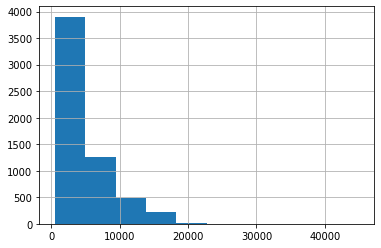

In [201]:
housing.loc[housing.city == "São Paulo", "rent amount (R$)"].hist();

É possivel ver que maioria dos dados estão entre 0 e 50000. Então vamos fazer um filtro para visualizar esses dados de uma melhor maneira.

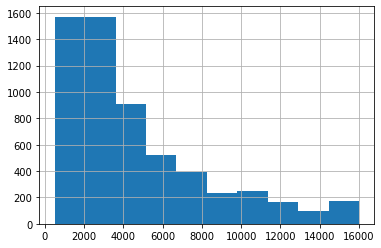

In [202]:
housing.loc[(housing.city == "São Paulo") & 
            (housing['rent amount (R$)'] <= 16000), "rent amount (R$)"].hist();

Vemos uma distribuição com uma inclinação positiva o que indica que os dados precisam ser normalizados.

Vamos ver alguns exemplos de registros acima dos 50000

In [203]:
housing.loc[(housing.city == "São Paulo") & (housing['rent amount (R$)'] > 16000)]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
157,São Paulo,660,4,5,5,12,acept,furnished,4800,20000,1750,254,26800
1253,São Paulo,315,3,5,2,14,not acept,not furnished,4300,20000,959,254,25510
1743,São Paulo,410,4,5,5,1,acept,not furnished,0,20000,0,254,20250
2182,São Paulo,700,4,7,8,-,acept,not furnished,0,45000,8750,677,54430
2619,São Paulo,80,2,1,1,1,acept,not furnished,875,24000,0,305,25180
2859,São Paulo,285,4,5,4,6,acept,furnished,200000,20000,1834,254,222100
5525,São Paulo,900,3,4,8,-,acept,not furnished,0,20000,3813,301,24110
5741,São Paulo,303,3,4,4,1,acept,furnished,4540,18000,0,229,22770
6185,São Paulo,455,4,5,4,5,acept,not furnished,8500,19500,3334,248,31580
6947,São Paulo,486,8,4,6,-,acept,not furnished,0,25000,2200,376,27580


#### Data Correlation

Verificando a correlação das features

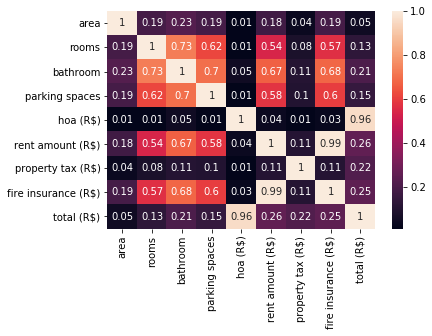

In [204]:
import seaborn as sns

corr = housing.corr()

ax = plt.subplot()
sns.heatmap(corr.round(2), annot=True, ax=ax)
ax.set_ylim([9, 0])
plt.show();

Plotando area vs o iptu da residência

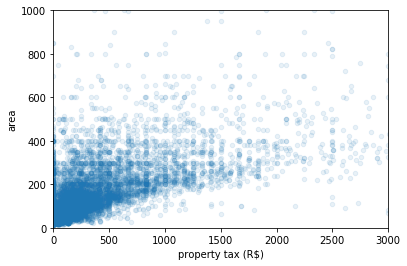

In [205]:
housing.plot(kind="scatter", x="property tax (R$)", y="area",
             alpha=0.1)
plt.axis([0, 3000, 0, 1000]);

#### Using Label Encoder

As colunas com variáveis nominais devem ser transformada em variáveis ordinais, pois os algoritmos de aprendizagem não aceitam variáveis nominais.

Para resolver isso podemos usar o LabelEncoder da biblioteca scikit-learn

In [206]:
housing.replace('-', 0, inplace = True) # Substituindo - por 0

In [207]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Codificando a coluna city
le.fit(housing.city.value_counts().keys())
print("Cidades: {}".format(le.classes_))
housing.city = le.transform(housing.city)

# Codificando a coluna animal
le.fit(housing.animal.value_counts().keys())
print("Aceita animal?: {}".format(le.classes_))
housing.animal = le.transform(housing.animal)

# Codificando a coluna furniture
le.fit(housing.furniture.value_counts().keys())
print("Mobiliada?: {}".format(le.classes_))
housing.furniture = le.transform(housing.furniture)

Cidades: ['Belo Horizonte' 'Campinas' 'Porto Alegre' 'Rio de Janeiro' 'São Paulo']
Aceita animal?: ['acept' 'not acept']
Mobiliada?: ['furnished' 'not furnished']


#### Delete Total (R\$)

Vamos deletar a coluna **total (R\\$)**. Como se trata de uma soma de **hoa (R\\$), rent amount (R\\$), property tax (R\\$), fire insurance (R\\$)**, está variável pode deixar o modelo tendencio a realizar o processo reverso a soma (subtração) e assim encontrar o valor do aluguel. 

In [208]:
housing.drop('total (R$)', axis=1, inplace=True)

#### Split Data

Vamos dividir os dados de treinamento e de teste. Vamos começar com o básico.

In [210]:
X = housing.drop('rent amount (R$)', axis=1).copy()
y = housing['rent amount (R$)'].copy()

In [213]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Using LinearRegression

In [214]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

Using RMSE e MAE para aferir a qualidade do ajuste do modelo

In [215]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
print("RMSE: {}".format(lin_rmse.round(2)))

lin_mae = mean_absolute_error(y_test, y_pred)
print("MAE: {}".format(lin_mae.round(2)))

RMSE: 461.09
MAE: 297.28


### Using DecisionTree

In [216]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [217]:
y_pred = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, y_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

379.7929230822362

### Using Cross Validation

In [218]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X, y,
                         scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

In [219]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_rmse_scores)

Scores: [337.82574899 330.22061339 598.63195476 283.93844772 298.24386372
 343.2930676  430.03989362 328.727878   395.04736217 279.04220957]
Mean: 362.50110395360304
Standard deviation: 90.44638153563768


In [221]:
X_test.iloc[0]

city                      1
area                    134
rooms                     3
bathroom                  3
parking spaces            2
floor                     7
animal                    1
furniture                 1
hoa (R$)               1000
property tax (R$)       177
fire insurance (R$)      32
Name: 1964, dtype: object

In [231]:
tree_reg.predict(housing.iloc[1965:1966].drop('rent amount (R$)', axis=1))

array([3600.])

In [224]:
X_test.iloc[0]

city                      1
area                    134
rooms                     3
bathroom                  3
parking spaces            2
floor                     7
animal                    1
furniture                 1
hoa (R$)               1000
property tax (R$)       177
fire insurance (R$)      32
Name: 1964, dtype: object

In [229]:
housing.iloc[1965:1966].drop('rent amount (R$)', axis=1)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),property tax (R$),fire insurance (R$)
1965,4,74,2,2,0,4,0,0,1105,210,46


In [230]:
housing.iloc[1965:1966]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$)
1965,4,74,2,2,0,4,0,0,1105,3600,210,46
